In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing the table
df = pd.read_csv('https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/Pesticide_treatment_data.txt', sep='\t')

In [3]:
# Transforming the dataframe
df = df.rename(columns={'Unnamed: 0': 'medium'}).set_index('medium').T

In [4]:
df.columns

Index(['WT_DMSO_1', 'WT_pesticide_0_1', 'WT_pesticide_8h_1',
       'WT_pesticide_24h_1', 'mutant_DMSO_1', 'mutant_pesticide_0_1',
       'mutant_pesticide_8h_1', 'mutant_pesticide_24h_1'],
      dtype='object', name='medium')

In [5]:
df.head()

medium,WT_DMSO_1,WT_pesticide_0_1,WT_pesticide_8h_1,WT_pesticide_24h_1,mutant_DMSO_1,mutant_pesticide_0_1,mutant_pesticide_8h_1,mutant_pesticide_24h_1
acetylcarnitine,7.000000,7.035531,6.773425,7.900711,6.498987,6.920949,6.000000,5.935605
aconitic_acid,-19.447639,-19.445951,-19.443194,-19.442015,-19.442820,-19.442771,-19.447581,-19.443570
adenine,-0.066413,-0.363286,0.048875,0.195580,0.761424,-1.394874,1.046610,0.227218
adenosine_cyclic_monophosphate,-1.917890,-1.700000,-1.632303,-2.173653,-3.291687,-3.434402,-1.417671,-1.683515
adenosine_monophosphate,2.967939,5.340498,3.705703,3.278473,5.197760,6.130594,5.265194,4.834391


In [6]:
# Difference in metabolic response (ΔM) between the DMSO treatment from the 24 hours treatment for the wild type
deltaM_WT = df.WT_pesticide_24h_1 - df.WT_DMSO_1

In [7]:
# Difference in metabolic response (ΔM) between the DMSO treatment from the 24 hours treatment for the mutants
deltaM_mutant = df.mutant_pesticide_24h_1 - df.mutant_DMSO_1

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

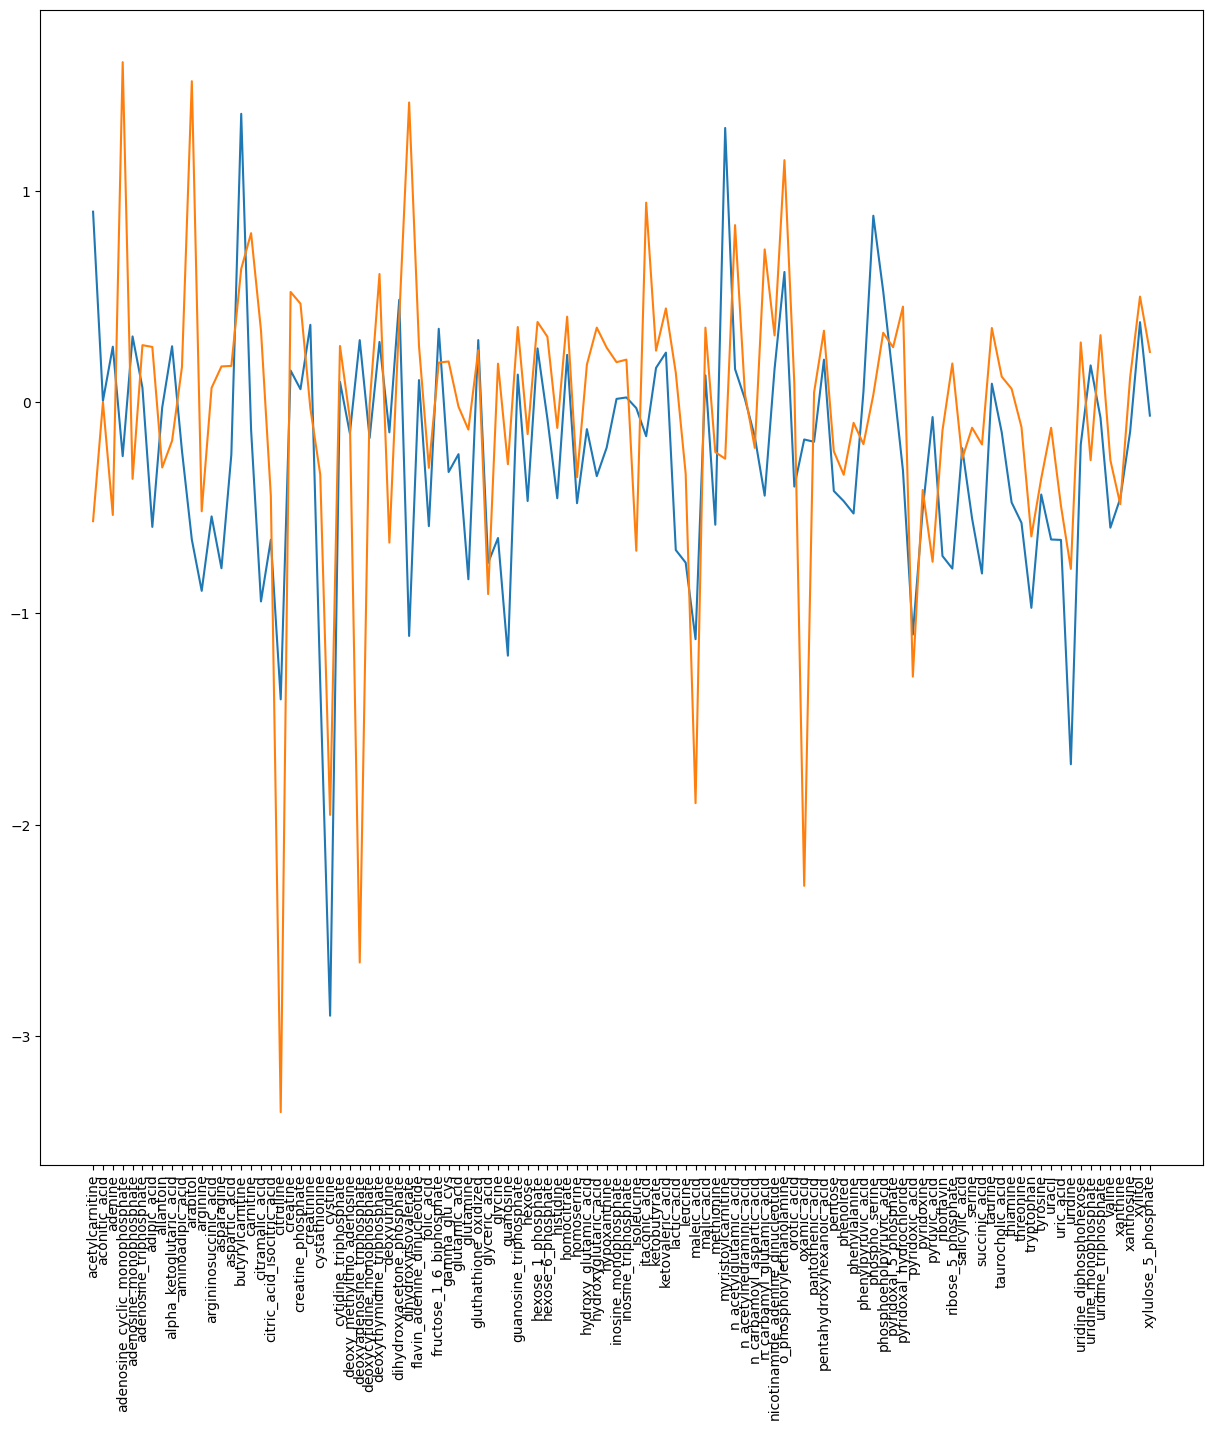

In [9]:
plt.figure(figsize=(15, 15))
plt.plot(deltaM_WT), plt.plot(deltaM_mutant)
plt.xticks(rotation=90);

In [10]:
dM_df = pd.DataFrame({'deltaM_WT': deltaM_WT, 'deltaM_mutant': deltaM_mutant})

In [11]:
dM_df.head()

,deltaM_WT,deltaM_mutant
acetylcarnitine,0.900711,-0.563382
aconitic_acid,0.005624,-0.000749
adenine,0.261993,-0.534206
adenosine_cyclic_monophosphate,-0.255763,1.608172
adenosine_monophosphate,0.310535,-0.363369


In [12]:
# For the line cutting through the scatterplot at y-intercept = 0 and gradient = 1 (c=0, m=1)
x_line = np.linspace(min(deltaM_WT), max(deltaM_WT), 100)
y_line = x_line

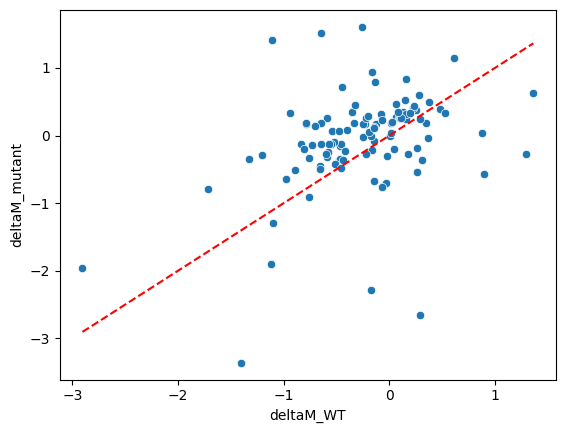

In [13]:
sns.scatterplot(dM_df, x=deltaM_WT, y=deltaM_mutant)
sns.lineplot(x=deltaM_WT, y=deltaM_WT, color='red', linestyle="--")
plt.xlabel('deltaM_WT')
plt.ylabel('deltaM_mutant');

C:\Users\tobij\AppData\Local\Temp\ipykernel_13388\838781795.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.vlines(x=dM_df.deltaM_WT[i], ymin=dM_df.deltaM_WT[i], ymax=dM_df.deltaM_mutant[i], colors='gray', linestyles='dotted')


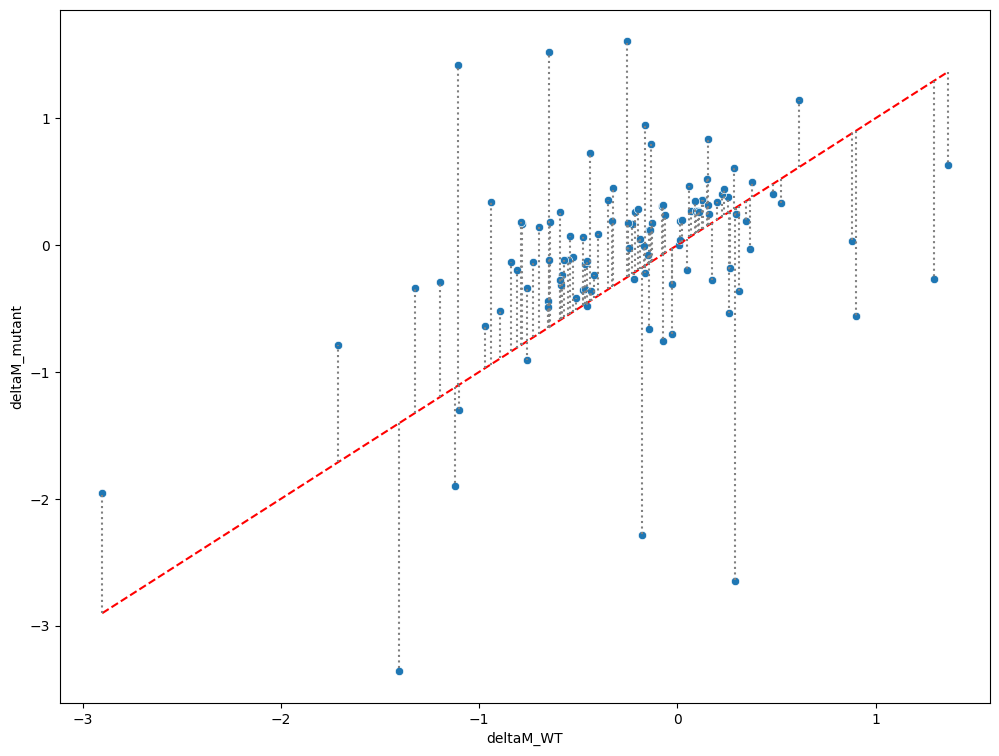

In [14]:
# Calculating and plotting the residuals
dM_df['resid'] = dM_df.deltaM_mutant - dM_df.deltaM_WT

plt.figure(figsize=(12, 9))
sns.scatterplot(dM_df, x=deltaM_WT, y=deltaM_mutant)
sns.lineplot(x=deltaM_WT, y=deltaM_WT, color='red', linestyle="--")

for i in range(len(dM_df)):
    plt.vlines(x=dM_df.deltaM_WT[i], ymin=dM_df.deltaM_WT[i], ymax=dM_df.deltaM_mutant[i], colors='gray', linestyles='dotted')

plt.xlabel('deltaM_WT')
plt.ylabel('deltaM_mutant');

C:\Users\tobij\AppData\Local\Temp\ipykernel_13388\2782262730.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.vlines(x=dM_df.deltaM_WT[i], ymin=dM_df.deltaM_WT[i], ymax=dM_df.deltaM_mutant[i], colors='gray', linestyles='dotted')


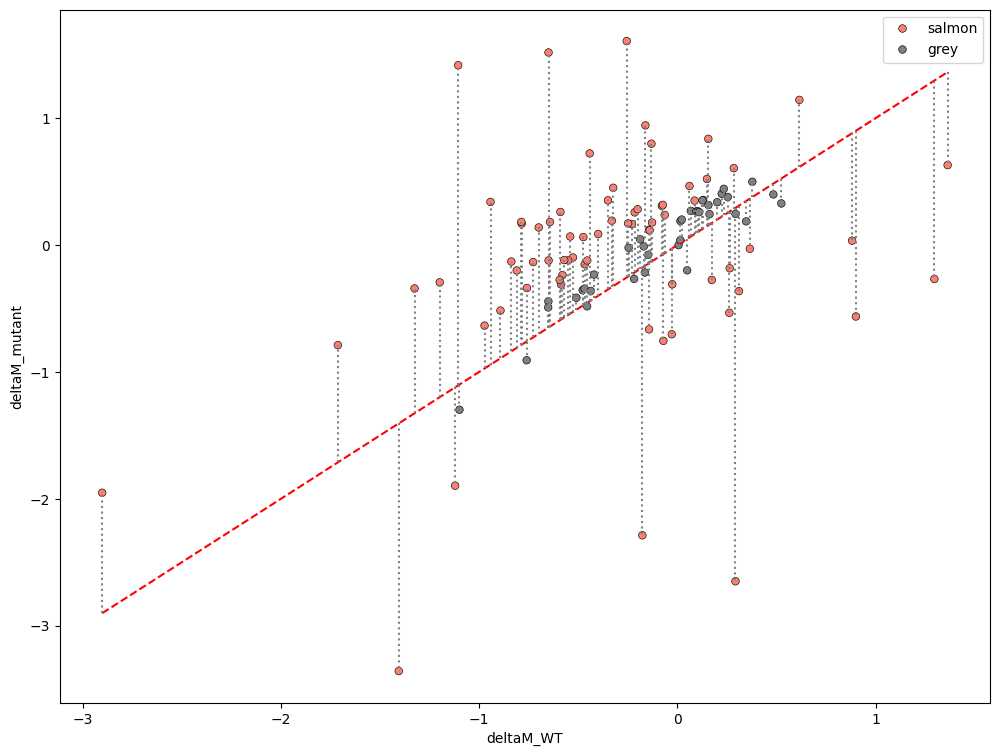

In [15]:
# Setting the abs(cutoff) to 0.25
cutoff = 0.25
dM_df['color'] = np.where(dM_df['resid'].abs() <= cutoff, 'grey', 'salmon')

plt.figure(figsize=(12, 9))
sns.scatterplot(dM_df, x=deltaM_WT, y=deltaM_mutant, hue='color', palette={'grey': 'grey', 'salmon': 'salmon'}, s=30, edgecolor='black')
sns.lineplot(x=deltaM_WT, y=deltaM_WT, color='red', linestyle="--")

for i in range(len(dM_df)):
    plt.vlines(x=dM_df.deltaM_WT[i], ymin=dM_df.deltaM_WT[i], ymax=dM_df.deltaM_mutant[i], colors='gray', linestyles='dotted')

plt.xlabel('deltaM_WT')
plt.ylabel('deltaM_mutant');

In [16]:
# Selecting the top 6 deviant metabolites
sigs = dM_df[abs(dM_df.resid) > 0.25]
sigs['abs_resid'] = abs(sigs.resid)
sigs = sigs.sort_values(by='abs_resid', ascending=False)

C:\Users\tobij\AppData\Local\Temp\ipykernel_13388\2609196713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigs['abs_resid'] = abs(sigs.resid)


In [17]:
top6deviants = sigs.head(6).index

In [19]:
top6deviants_df = df.loc[top6deviants]

In [20]:
top6deviants_df

medium,WT_DMSO_1,WT_pesticide_0_1,WT_pesticide_8h_1,WT_pesticide_24h_1,mutant_DMSO_1,mutant_pesticide_0_1,mutant_pesticide_8h_1,mutant_pesticide_24h_1
deoxyadenosine_triphosphate,6.573615,5.869507,6.492532,6.866636,5.651414,5.000000,4.000000,3.000000
dihydroxyisovalerate,-0.713532,-0.935865,-2.097966,-1.820016,-2.221298,-0.746346,-0.289915,-0.803809
arabitol,3.130301,3.019524,3.208421,2.479789,1.726235,1.296539,2.737335,3.244382
oxamic_acid,0.173258,2.897674,2.217075,-0.003728,3.546256,3.600000,3.747794,1.257592
citrulline,4.406388,0.801101,2.697068,3.000000,3.631938,3.798685,2.100000,0.272542
adenosine_cyclic_monophosphate,-1.917890,-1.700000,-1.632303,-2.173653,-3.291687,-3.434402,-1.417671,-1.683515


In [23]:
top6dev = top6deviants_df.index.to_list()

In [32]:
listo = []
for i in top6dev:
    listo.append(top6deviants_df.loc[i, ['WT_pesticide_0_1', 'WT_pesticide_8h_1', 'WT_pesticide_24h_1']].to_list())
listo

[[5.869506965, 6.492531501, 6.866636378],
 [-0.935864885, -2.097966441, -1.820016376],
 [3.019524242, 3.208420803, 2.479788896],
 [2.897673982, 2.217075268, -0.003728338],
 [0.801100719, 2.697068209, 3.0],
 [-1.7, -1.632302869, -2.173653327]]

In [34]:
from itertools import chain
flattened_listo = list(chain(*listo))
flattened_listo

[5.869506965,
 6.492531501,
 6.866636378,
 -0.935864885,
 -2.097966441,
 -1.820016376,
 3.019524242,
 3.208420803,
 2.479788896,
 2.897673982,
 2.217075268,
 -0.003728338,
 0.801100719,
 2.697068209,
 3.0,
 -1.7,
 -1.632302869,
 -2.173653327]

In [60]:
WTplot_data = {
    'metabolite': np.repeat([top6dev], 3),
    'time': ['0h', '8h', '24h'] * 6,
    'value': flattened_listo
}

In [61]:
WTplot_df = pd.DataFrame(WTplot_data)

In [62]:
WTplot_df['time'] = pd.Categorical(WTplot_df['time'], categories=['0h', '8h', '24h'], ordered=True)

In [63]:
WTplot_df

,metabolite,time,value
0,deoxyadenosine_triphosphate,0h,5.869507
1,deoxyadenosine_triphosphate,8h,6.492532
2,deoxyadenosine_triphosphate,24h,6.866636
3,dihydroxyisovalerate,0h,-0.935865
4,dihydroxyisovalerate,8h,-2.097966
5,dihydroxyisovalerate,24h,-1.820016
6,arabitol,0h,3.019524
7,arabitol,8h,3.208421
8,arabitol,24h,2.479789
9,oxamic_acid,0h,2.897674


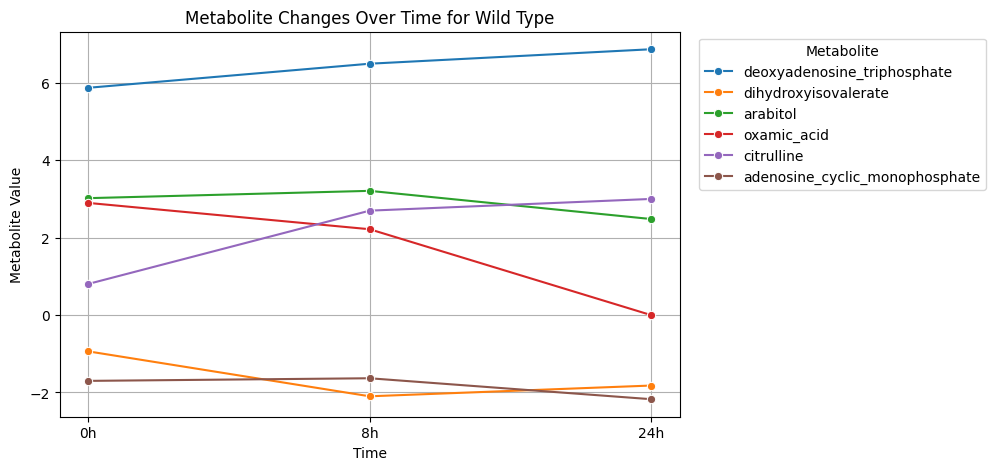

In [65]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=WTplot_df, x='time', y='value', hue='metabolite', marker='o')

plt.xlabel("Time")
plt.ylabel("Metabolite Value")
plt.title("Metabolite Changes Over Time for Wild Type")
plt.legend(title="Metabolite", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid()

plt.show()

- Deoxyadenosine triphosphate's values rose over time, indicating accumulation
- Dihydroxyisovalerate dropped and rose a lttle bit, showing some type of fluctuating metabolic activity
- Arabitol's values rose and dropped, also showing some type of fluctuating metabolic activity
- Oxamic acid's values sharply dropped, showing massive depletion.
- Citrulline's values sharply increased, showing nice accumulation.
- Adenosine cyclic monophosphate rose ever so slightly and then dropped a little bit, indicating fluctuating metabolic activity

In [48]:
listo2 = []
for i in top6dev:
    listo2.append(top6deviants_df.loc[i, ['mutant_pesticide_0_1', 'mutant_pesticide_8h_1', 'mutant_pesticide_24h_1']].to_list())
listo2

[[5.0, 4.0, 3.0],
 [-0.746346353, -0.289915347, -0.803808871],
 [1.296539458, 2.7373347, 3.244381818],
 [3.6, 3.747794473, 1.257591674],
 [3.798684673, 2.1, 0.272542016],
 [-3.434402334, -1.417670912, -1.683514639]]

In [49]:
from itertools import chain
flattened_listo2 = list(chain(*listo2))
flattened_listo2

[5.0,
 4.0,
 3.0,
 -0.746346353,
 -0.289915347,
 -0.803808871,
 1.296539458,
 2.7373347,
 3.244381818,
 3.6,
 3.747794473,
 1.257591674,
 3.798684673,
 2.1,
 0.272542016,
 -3.434402334,
 -1.417670912,
 -1.683514639]

In [50]:
MUTplot_data = {
    'metabolite': np.repeat([top6dev], 3),
    'time': ['0h', '8h', '24h'] * 6,
    'value': flattened_listo2
}

In [51]:
MUTplot_df = pd.DataFrame(MUTplot_data)

In [52]:
MUTplot_df['time'] = pd.Categorical(MUTplot_df['time'], categories=['0h', '8h', '24h'], ordered=True)

In [53]:
MUTplot_df

,metabolite,time,value
0,deoxyadenosine_triphosphate,0h,5.000000
1,deoxyadenosine_triphosphate,8h,4.000000
2,deoxyadenosine_triphosphate,24h,3.000000
3,dihydroxyisovalerate,0h,-0.746346
4,dihydroxyisovalerate,8h,-0.289915
5,dihydroxyisovalerate,24h,-0.803809
6,arabitol,0h,1.296539
7,arabitol,8h,2.737335
8,arabitol,24h,3.244382
9,oxamic_acid,0h,3.600000


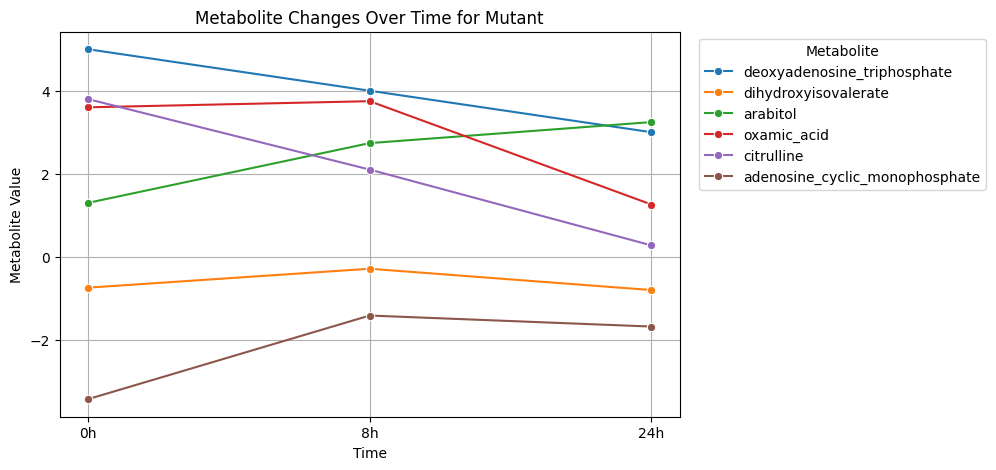

In [54]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=MUTplot_df, x='time', y='value', hue='metabolite', marker='o')

plt.xlabel("Time")
plt.ylabel("Metabolite Value")
plt.title("Metabolite Changes Over Time for Mutant")
plt.legend(title="Metabolite", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid()

plt.show()

- Deoxyadenosine triphosphate shows steady depletion over time
- Dihydroxyisovalerate rose and fell, showing some type of fluctuating metabolic activity
- Arabitol's values rose, indicating accumulation
- Oxamic acid's values sharply dropped, showing depletion.
- Citrulline's values dropped at a constant rate, showing constant depletion of the metabolite
- Adenosine cyclic monophosphate rose sharply and the dropped a little bit, indicating a fluctuating or one can say dynamic metabolic activity